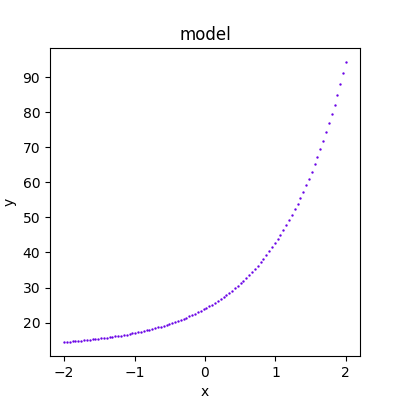

In [268]:
import matplotlib.pyplot as plt
import numpy as np
from math import e

def pro(xi,c1,c2,c3):
    return c1+c2*e**(c3*xi)

c1=np.random.randint(10,20)
c2=np.random.randint(0,20)
c3=np.random.randint(0,20)

xi=np.linspace(-2,2,100)
yi=pro(xi,c1,c2,c3)

plt.figure(figsize=(4,4))

plt.scatter(xi,yi,s=2,c="#6800e6",marker='.')
plt.title("model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [269]:
from numpy.linalg import norm, inv

def computeDf(c, x):
    Df = np.zeros((len(x), len(c))) # Check that this is correct
    Df[:, 0] = 1
    Df[:, 1] = e**(c[2]*x)
    Df[:, 2] = x*c[1]*e**(c[2]*x)
    return Df

def GaussNewton(c0, x, y):
    maxIter = 100
    tol = 1e-5
    Df = computeDf(c0, x)
    f = pro(x, *c0.T) # f(c0)
    res = y - f # residuals
    i = 1
    c = c0
    while(  norm( np.matmul(Df.T, res)  ) > tol and i < maxIter  ):
        c = c + np.matmul( inv( np.matmul(Df.T, Df) ) , np.matmul(Df.T, np.subtract(y, f) )  )
        # Update
        Df = computeDf(c, x)
        f = pro(x, *c.T)
        res = y - f
        i += 1
    return c, i, res
yi=pro(xi,c1,c2,c3)
c0 = np.array( [15,5,5] )

c, i, res = GaussNewton(c0, xi, yi)
print("Parameters found with Gauss-Newton: ", c)
print("Number of iterations done ", i)


Parameters found with Gauss-Newton:  [13. 11.  1.]
Number of iterations done  22


In [270]:
#add noise here
def prop(xi,c1,c2,c3):
    n=np.random.randn()
    return c1+c2*e**(c3*xi)+n
yii=prop(xi,c1,c2,c3)
cnew, i, res = GaussNewton(c0, xi, yii)
print("Parameters found with Gauss-Newton: ", cnew)
print("Number of iterations done ", i)

Parameters found with Gauss-Newton:  [12.38582874 11.          1.        ]
Number of iterations done  22


MMSE: 3.4047236669338867e-29


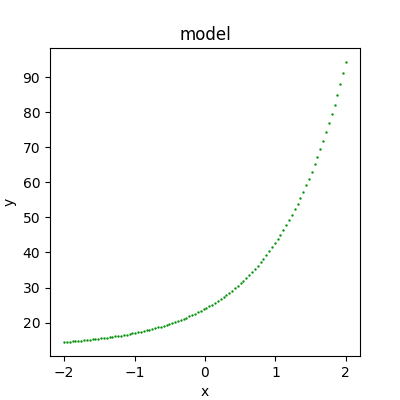

In [271]:
#predicted function without noise
yi2=pro(xi,c[0],c[1],c[2])
MSE = np.square(np.subtract(yi,yi2)).mean()
print("MMSE:",MSE)
plt.figure(figsize=(4,4))
plt.scatter(xi,yi2,s=2,c="#019006",marker='.')
plt.title("model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

MMSE: 0.3772063366487663



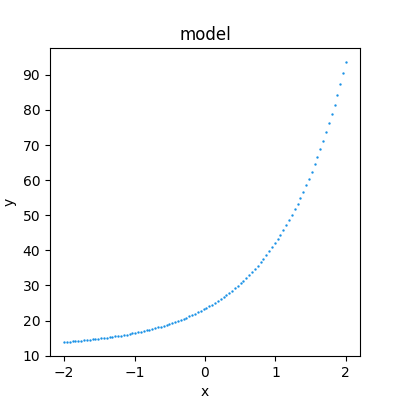

In [272]:
#predicted function with noise
yi3=pro(xi,cnew[0],cnew[1],cnew[2])
MSE = np.square(np.subtract(yi,yi3)).mean()
print("MMSE:",MSE)
print()
plt.figure(figsize=(4,4))
plt.scatter(xi,yi3,s=2,c="#1890e6",marker='.')
plt.title("model")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

When the noise is added, c will change especially c1 as it is directly affected. And as noise is getting larger, c1 will change larger and MMSE will also becomes larger most of the time, comparing to the one without noise. However, MMSE of the one with the noise could be even smaller if noise is small comparing to other constant. Also, when N is large, both problem will be more precise, more iteration times, and MMSE will be smaller on average. The changes of parameter will have different result depending on specific problem and c2 and c3 are easy to predict. 